In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Dataset Discription
___

Dataset : Seeds  
Obtained from kaggle https://www.kaggle.com/datasets/rwzhang/seeds-dataset  
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment.  
Has 10 columns (All except 'Unnamed: 8' and 'Unnamed: 9' used in this prediction)

In [2]:
# Read the data from the csv file
# Obtained from kaggle https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data
df_rawData = pd.read_csv('seeds_dataset.csv')
# 'Class (1, 2, 3)' would be our target.

In [3]:
# Checking to see how many rows we have in this dataset
df_rawData.shape[0]

210

In [4]:
df_rawData

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,NaN,NaN
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,NaN,NaN
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,NaN,NaN
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,NaN,NaN


### Clean and re-Organize Data
Drop 'Unnamed: 8' and 'Unnamed: 9'  
Change 'Class (1, 2, 3)' to 'Variety'  
___

In [5]:
# Drop unwanted columns
df_rawData = df_rawData.drop(['Unnamed: 8', 'Unnamed: 9'], axis='columns')

In [6]:
# Rename the variety column
df_rawData = df_rawData.rename(columns={'Class (1, 2, 3)': 'Variety'})

In [7]:
df_rawData.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [8]:
# Find out the unique quality levels in the dataset.
df_rawData['Variety'].unique()

array([1, 2, 3], dtype=int64)

### EXPLORE THE DATA MORE HERE (CHARTS)

In [9]:
# Practice slicing here.

**Train Test Split**
___

In [10]:
# Divide data into training and testing using Sklearn
from sklearn.model_selection import train_test_split

In [11]:
# Drop the column from the dataset 
X = df_rawData.drop(['Variety'], axis='columns')
# Create a table of just the Classifications. 
y = df_rawData.Variety

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [13]:
len(X_train)

168

In [14]:
len(X_test)

42

### Create KNN (K Nearest Neighbour Classifier)
___

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [17]:
knn.score(X_test, y_test)

0.8809523809523809

**Plot Confusion Matrix**
___

In [18]:
"""
Predict and store them in a variable. 
"""
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  2,  3],
       [ 0,  9,  0],
       [ 0,  0, 13]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

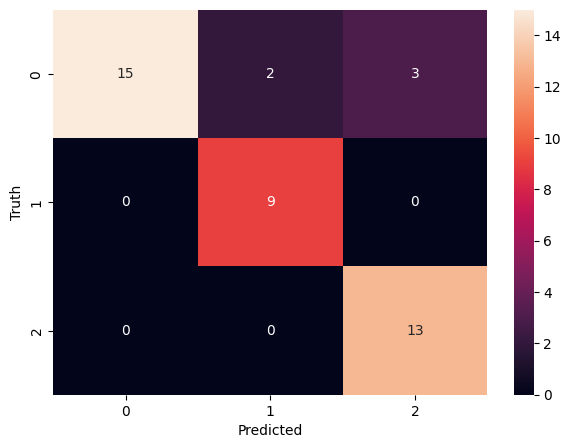

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Print classification report for precesion, recall and f1-score for each classes**
___

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86        20
           2       0.82      1.00      0.90         9
           3       0.81      1.00      0.90        13

    accuracy                           0.88        42
   macro avg       0.88      0.92      0.88        42
weighted avg       0.90      0.88      0.88        42

